In [ ]:
from google.colab import files
uploaded = files.upload()


Saving insurance.csv to insurance.csv


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn joblib


✅ Dataset Loaded Successfully!

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

📋 Missing Values:
age         0
sex      

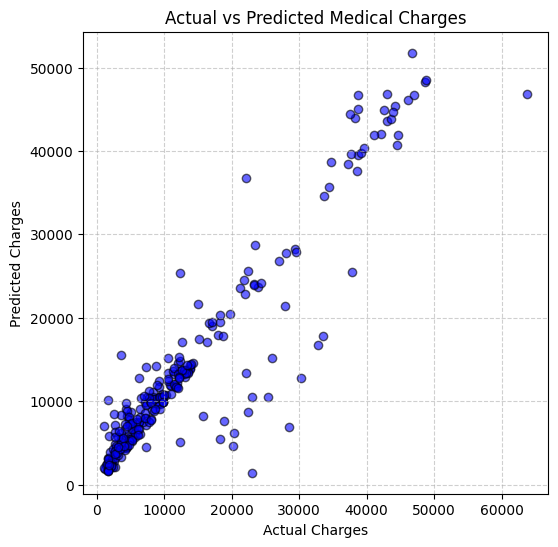


💾 Model Saved Successfully as 'medical_cost_model.pkl'


In [ ]:
# ===== Medical Cost Prediction Project =====

# 1️⃣ Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib

# 2️⃣ Load Dataset
df = pd.read_csv("insurance.csv")
print("✅ Dataset Loaded Successfully!\n")
print(df.head())

# 3️⃣ Data Information
print("\n📊 Dataset Info:")
print(df.info())

print("\n📋 Missing Values:")
print(df.isnull().sum())

# 4️⃣ Data Preprocessing (Convert Categorical → Numeric)
df = pd.get_dummies(df, drop_first=True)

# 5️⃣ Split Features (X) and Target (y)
X = df.drop('charges', axis=1)
y = df['charges']

# 6️⃣ Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 7️⃣ Train the Model (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 8️⃣ Make Predictions
y_pred = model.predict(X_test)

# 9️⃣ Evaluate the Model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n📈 Model Evaluation:")
print(f"R2 Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

# 🔟 Visualization (Actual vs Predicted)
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', edgecolor='k')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 1️⃣1️⃣ Save Trained Model
joblib.dump(model, 'medical_cost_model.pkl')
print("\n💾 Model Saved Successfully as 'medical_cost_model.pkl'")



In [ ]:
from google.colab import files
files.download('medical_cost_model.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>